In [89]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [9]:
mobile_spec = pd.read_csv('automobile-spec.csv')
mobile_risk = pd.read_csv('automobile-risk.csv')
mobile_losses = pd.read_csv('automobile-losses.csv')

In [18]:
df_mobile = pd.merge(mobile_spec, mobile_risk, how = 'inner', on = 'ID').round(2)
df_mobile = pd.merge(mobile, mobile_losses, how = 'inner', on = 'ID').round(2)
df_mobile.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses_x,normalized-losses_y
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0,164.0


In [19]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 28 columns):
ID                     205 non-null int64
make                   205 non-null object
fuel-type              205 non-null object
aspiration             205 non-null object
num-of-doors           204 non-null object
body-style             205 non-null object
drive-wheel            205 non-null object
engine-loc             205 non-null object
wheel-base             205 non-null float64
length                 205 non-null float64
width                  205 non-null float64
height                 205 non-null float64
curb-weight            205 non-null int64
engine-type            205 non-null object
cylinder               205 non-null object
engine-size            205 non-null int64
fuel-system            205 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression-ratio      205 non-null float64
horsepower             203 non-

In [20]:
df_numeric = mobile.drop(['ID','make','fuel-type','aspiration','num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'engine-type',
            'cylinder', 'fuel-system'], axis=1)
df_numeric.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


In [36]:
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 16 columns):
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
symboling            205 non-null int64
normalized-losses    164 non-null float64
dtypes: float64(11), int64(5)
memory usage: 37.2 KB
None


In [37]:
# sns.pairplot(df_numeric, hue='compression-ratio', kind='scatter')

In [45]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 16 columns):
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
symboling            205 non-null int64
normalized-losses    164 non-null float64
dtypes: float64(11), int64(5)
memory usage: 37.2 KB


In [47]:
dataset = df_numeric[['horsepower','price']]
dataset.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [48]:
percentage = round(dataset.isnull().sum()/len(dataset)*100,2).sort_values(ascending = False)
percentage.head()

price         1.95
horsepower    0.98
dtype: float64

In [49]:
dataset.shape

(205, 2)

In [50]:
dataset = dataset.dropna()
dataset.shape

(199, 2)

In [51]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(dataset)

## 1. K-Means

Text(0.5,1,'Grafik Horsepower vs. Price')

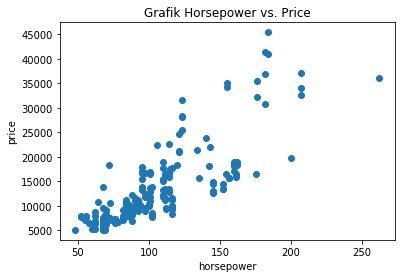

In [52]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("horsepower")
plt.ylabel("price")
plt.title("Grafik Horsepower vs. Price")

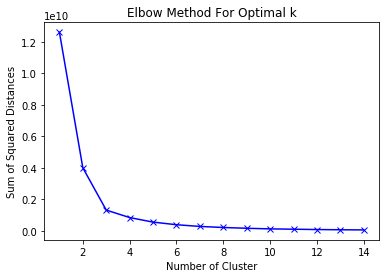

In [53]:
Sum_of_squared_distances = [] # dalam bentuk list
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_) # inertia : sum of squared distance

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Distances') # WSS
plt.title('Elbow Method For Optimal k')
plt.show()

In [54]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[   81.78333333  8385.525     ]
 [  125.93650794 16971.6984127 ]
 [  176.75       34997.6875    ]]


In [56]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 2 2 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 2 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 2 2 2 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [58]:
labels = kmeans.labels_
dataset['cluster'] = pd.DataFrame(labels).round(0)
dataset.head()

,horsepower,price,cluster
0,111.0,13495.0,1.0
1,111.0,16500.0,1.0
2,154.0,16500.0,1.0
3,102.0,13950.0,1.0
4,115.0,17450.0,1.0


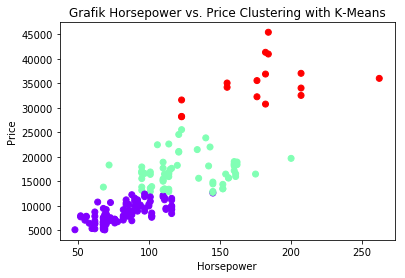

In [63]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Grafik Horsepower vs. Price Clustering with K-Means')
plt.show()

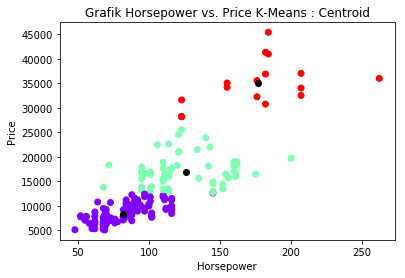

In [64]:
# Step 8 Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Grafik Horsepower vs. Price K-Means : Centroid')
plt.show()

In [65]:
# Memasukkan hasil label ke dalam suatu list
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)
data_clustered

array([[9.2000e+01, 8.9480e+03, 0.0000e+00],
       [7.0000e+01, 8.2380e+03, 0.0000e+00],
       [1.1200e+02, 9.2980e+03, 0.0000e+00],
       [1.1200e+02, 9.5380e+03, 0.0000e+00],
       [9.7000e+01, 9.5490e+03, 0.0000e+00],
       [9.7000e+01, 8.9490e+03, 0.0000e+00],
       [6.9000e+01, 8.2490e+03, 0.0000e+00],
       [6.9000e+01, 7.9990e+03, 0.0000e+00],
       [6.9000e+01, 7.4990e+03, 0.0000e+00],
       [6.9000e+01, 7.7990e+03, 0.0000e+00],
       [6.9000e+01, 7.2990e+03, 0.0000e+00],
       [6.9000e+01, 7.3490e+03, 0.0000e+00],
       [6.9000e+01, 6.8490e+03, 0.0000e+00],
       [6.9000e+01, 6.6490e+03, 0.0000e+00],
       [5.5000e+01, 7.0990e+03, 0.0000e+00],
       [7.0000e+01, 8.0580e+03, 0.0000e+00],
       [6.9000e+01, 5.4990e+03, 0.0000e+00],
       [1.1600e+02, 9.2790e+03, 0.0000e+00],
       [8.8000e+01, 8.1890e+03, 0.0000e+00],
       [8.8000e+01, 6.9890e+03, 0.0000e+00],
       [1.1600e+02, 8.4490e+03, 0.0000e+00],
       [1.1600e+02, 9.6390e+03, 0.0000e+00],
       [1.

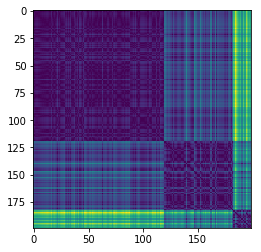

In [66]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [69]:
# Memasukkan hasil label ke dalam suatu data frame
data_clustered1 = pd.DataFrame(dataset)
data_clustered1['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered1 = data_clustered1.sort_values('cluster')
data_clustered1.head()

,horsepower,price,cluster
167,116.0,8449.0,0.0
158,56.0,7898.0,0.0
159,56.0,7788.0,0.0
160,70.0,7738.0,0.0
161,70.0,8358.0,0.0


## 2. Hierarchical Clustering

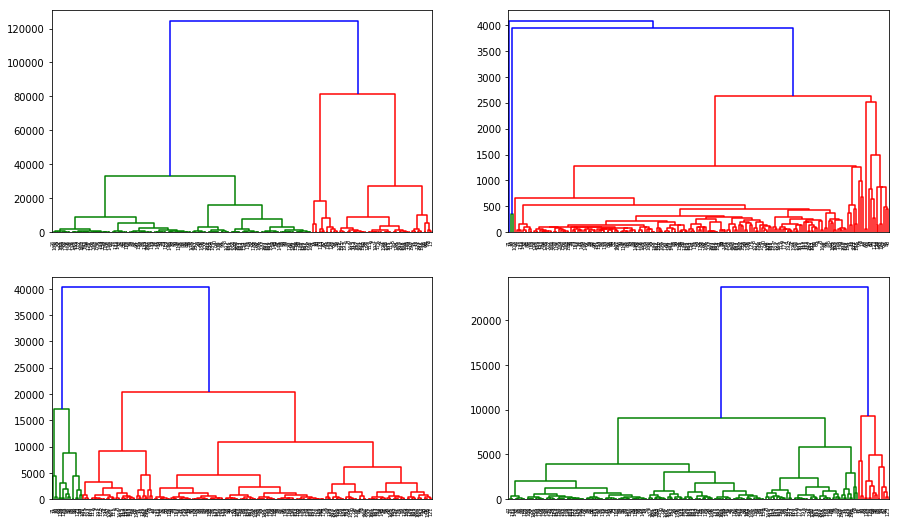

In [82]:
# membuat dendogram
f=plt.figure(figsize=(15,9))

f.add_subplot(2,2,1)
# ward linkage
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

f.add_subplot(2,2,2)
# single linkage
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

f.add_subplot(2,2,3)
# complete linkage
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

f.add_subplot(2,2,4)
# average linkage
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [87]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

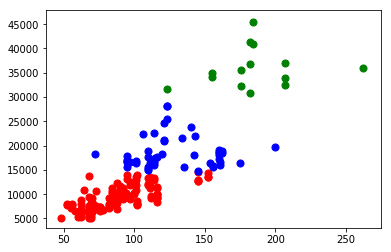

In [90]:
# Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

## 3. DBSCAN

In [198]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=1500, min_samples=2, metric='euclidean')
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [199]:
# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  1  1  1  2 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]


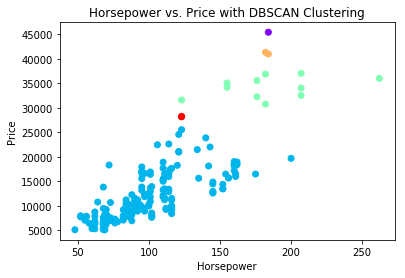

In [201]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title("Horsepower vs. Price with DBSCAN Clustering")
plt.show()

### 1. Berapa cluster yang Anda buat? Anda menggunakan atribut atau features apa saja?

**Banyaknya features yang digunakan** <br>
Dalam kasus ini saya ingin mengetahui pengelompokan dari Harga berdasarkan Horsepower mobil. Sehingga features yang digunakan adalah 'horsepower' dan 'price'. <br> <br>
**Cluster yang terbentuk dari Clustering** <br>
Dari ketiga metode clustering yang dilakukan banyaknya cluster yang dihasilkan adalah 3 cluster untuk metode K-Means dan Hierarchical Clustering, serta 4 cluster untuk DBSCAN. <br>

### 2. Manakah algoritma clustering yang Anda ambil? Mengapa?

**Metode Clustering terbaik** <br>
Dari ketiga metode clustering yang diuji, dipilih metode K-Means atau Hierarchical Clustering. Sebenarnya lebih kepada metode K-Means dikarenakan lebih detail dan pasti karena tidak banyak penggunakan perkiraan atau coba-coba. Sementara untuk DBSCAN pada saat penentuan epsilon lebih banyak mengandalkan feeling dan perkiraan (tidak ada cara untuk menentukan epsilon optimal). Sehingga hasil yang didapat menurut saya kurang akurat. Selanjutnya hasil plot yang didapat juga kurang bagus untuk implementasi data horsepower dan price.

### 3. Apakah masing-masing cluster memiliki ciri-ciri yang berbeda? Apa saja ciri dari masing-masing cluster?

**Ciri masing-masing cluster dengan Metode K-Means** <br>
Cluster 1 : rentang price 0 - 13.000 <br>
Cluster 2 : rentang price 13.000 - 27.000 <br>
Cluster 3 : rentang price 27.000 - 45.000 <br>